In [35]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from config.resources import path_to

In [37]:
jbv_df = pd.read_csv(path_to['jbv_meta'])

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

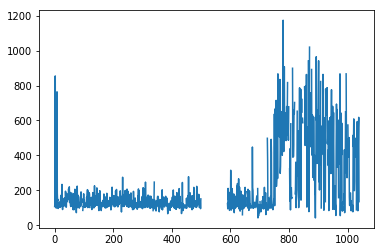

In [39]:
jbv_df['abstract_len'] = jbv_df['AB'].dropna().apply(lambda a: len(a.split()))

plt.plot(jbv_df['abstract_len'].tolist())

In [40]:
abstracts = jbv_df['AB'].dropna()
nb_features = 600 

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=nb_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(abstracts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [41]:
from sklearn.decomposition import NMF

nb_topics = 20

# Run NMF
nmf = NMF(n_components=nb_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [42]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

In [43]:
nb_top_words = 10
display_topics(nmf, tf_feature_names, nb_top_words)

Topic 0:
firms performance firm resources technology innovation relationship small results research
Topic 1:
entrepreneurship research field issue article education theory scholars theories paper
Topic 2:
venture capitalists value capitalist criteria investment capital entrepreneur information ventures
Topic 3:
family 2003 members involvement agency firms ownership relationships business theory
Topic 4:
capital human investors public equity private financing companies funds investments
Topic 5:
new ventures venture product industry creation survival activities market knowledge
Topic 6:
self employment employed career entry individuals influence likelihood efficacy factors
Topic 7:
business small businesses owners start owner planning study founders successful
Topic 8:
social network networks ties capital impact paper founders perspective interaction
Topic 9:
franchising franchise franchisees franchisor franchisee franchisors units systems agency independent
Topic 10:
exit entry likelih